In [135]:
import pandas as pd             
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [136]:
df = pd.read_csv("train_loan_pred.csv")

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [77]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [80]:
df.shape

(614, 13)

In [81]:
df.isnull().sum() * 100/df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [137]:
df_Gender = pd.get_dummies(df['Gender'],drop_first=True)
df.drop(['Gender'],axis=1,inplace=True)
df = pd.concat([df,df_Gender],axis=1)
df_Dependents = pd.get_dummies(df['Dependents'],drop_first=True)
df.drop(['Dependents'],axis=1,inplace=True)
df = pd.concat([df,df_Dependents],axis=1)
df_Maried = pd.get_dummies(df['Married'],drop_first=True)
df.drop(['Married'],axis=1,inplace=True)
df = pd.concat([df,df_Maried],axis=1)
df_Edu = pd.get_dummies(df['Education'],drop_first=True)
df.drop(['Education'],axis=1,inplace=True)
df = pd.concat([df,df_Edu],axis=1)
df_selfemp = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df = pd.concat([df,df_selfemp],axis=1)
df_prop = pd.get_dummies(df['Property_Area'],drop_first=True)
df.drop(['Property_Area'],axis=1,inplace=True)
df = pd.concat([df,df_prop],axis=1)


In [138]:
df['Loan_Status'] = df['Loan_Status'].apply(lambda x: '1' if x == 'Y' else '0')

In [139]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,1,2,3+,Yes,Not Graduate,Yes,Semiurban,Urban
0,LP001002,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,LP001003,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,0,0
2,LP001005,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,1,0,1,0,1
3,LP001006,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,1,0,0,1
4,LP001008,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [29]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [143]:
df_train  = df.values

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         592 non-null    float64
 4   Loan_Amount_Term   600 non-null    float64
 5   Credit_History     564 non-null    float64
 6   Loan_Status        614 non-null    object 
 7   Male               614 non-null    uint8  
 8   1                  614 non-null    uint8  
 9   2                  614 non-null    uint8  
 10  3+                 614 non-null    uint8  
 11  Yes                614 non-null    uint8  
 12  Not Graduate       614 non-null    uint8  
 13  Yes                614 non-null    uint8  
 14  Semiurban          614 non-null    uint8  
 15  Urban              614 non-null    uint8  
dtypes: float64(4), int64(1), o

In [144]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_mean.fit(df_train)

SimpleImputer(strategy='most_frequent')

In [145]:
df_new  = imp_mean.transform(df_train)

In [146]:
X1 = df_new[:,1:5]
y = df_new[:,6]
X2 = df_new[:,7:15]
X = np.hstack([X1,X2])

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [149]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [150]:
y_pred = model.predict(X_train)

In [151]:
y_pred1 = model.predict(X_test)

In [153]:
#feature importance
model.coef_

array([[-5.62164668e-06, -4.34616503e-05, -2.16834145e-03,
        -6.73555655e-03,  9.78619790e-01,  6.42088580e+00,
        -2.65291457e-01, -3.71022605e-01,  1.21495893e-01,
        -1.87165057e-02,  1.46681956e-01, -4.05677709e-01,
        -1.39012362e-01,  1.62287973e-01]])

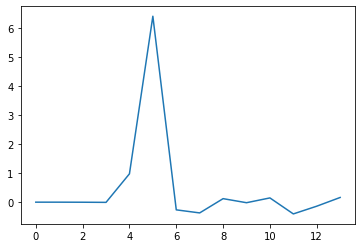

In [155]:
plt.plot(model.coef_[0])